In [1]:
import re
import itertools
import collections

import torch
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [228]:
class DT(torch.utils.data.Dataset):
    def __init__(self, path, margin=1, tokens=None):

        with open(path, 'r', encoding='utf8') as file:

            print('loading data...')
            samples = file.read().split('\n\n')
            raw_data = [self.tokenize(x) for x in samples if len(x) > 0]

            if margin > 0:
                print('removing length outliers...')
                l = [len(x[0]) for x in raw_data]
                b1p = np.quantile(l, margin/100, interpolation='nearest')
                t1p = np.quantile(l, (100 - margin)/100, interpolation='nearest')
                raw_data = [x for x in raw_data if b1p < len(x[0]) < t1p]

            self.X, self.Y = list(zip(*raw_data))
            
            if tokens is None:
                print('extracting tokens...')
                self.tokens = list({x for l in self.X for x in l})

                print('computing tf index...')
                self.tf = collections.Counter(itertools.chain(*self.X))

                print('computing df index...')
                self.df = collections.Counter(itertools.chain(*[{y for y in x} for x in self.X]))


            #     for x in tqdm(tokens, desc='computing token\'s document frequencies'):
            #         freq[x] = 0

            #         for y in raw_data:
            #             if x in y:
            #                 freq[x] += 1

                # blacklist = []

                # for x, y in tqdm(freq.items(), desc='making blacklist tokens'):
                #     if y < len(X) * 20 / 100:
                #         blacklist.append(x)
            
            # tokens = [u'\u2021rare'] + [x for x in tokens if x not in blacklist]

            self.lengths = np.array([len(x) for x in raw_data])
            self.max_len = self.lengths.max()
        self.data, self.labels = self.pad_all(raw_data, self.max_len)

    def tokenize(self, sample):
        tokens = [(re.sub('\sgen_.*', '',  x), 1 if x.endswith('positive') else 0) for x in sample.split('\n')]
        return list(zip(*[x for x in tokens if len(x[0]) > 0]))

    def pad_all(self, samples, max_len):
        return 0,1

    def __len__(self):
        return self.labels.shape[0]

    def __getitem__(self, index):    
        return self.input_ids[index], self.attention_mask[index], self.labels[index]

In [229]:
t = DT('./train.data')

loading data...
removing length outliers...
extracting tokens...
computing tf index...
computing df index...


In [230]:
len(t.df)

55909

In [227]:
a = [['mehdi', 'is', 'sad'], ['mehdi', 'is', 'pretty'], ['fuck', 'mehdi', 'and', 'ali', 'and', 'mehdi']]
collections.Counter(itertools.chain(*[{y for y in x} for x in a]))

Counter({'is': 2,
         'mehdi': 3,
         'sad': 1,
         'pretty': 1,
         'ali': 1,
         'fuck': 1,
         'and': 1})

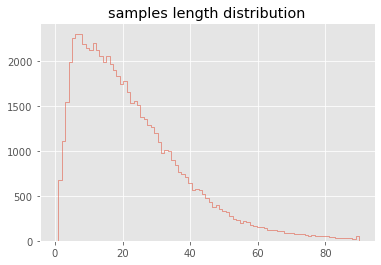

In [131]:
plt.hist(t.lengths, histtype=u'step', bins=np.linspace(0, t.max_len, t.max_len))
plt.title('samples length distribution');

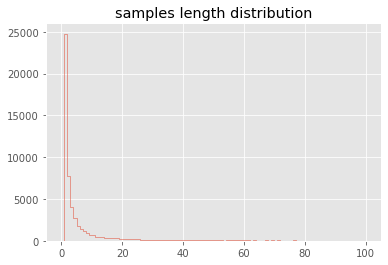

In [241]:
d = 100
plt.hist(t.tf.values(), histtype=u'step', bins=np.linspace(0, d, d+1))
plt.title('samples length distribution');

In [244]:
" ".join(t.X[0])

'# منبع : ) مجلة سروش هفتگی ، مصاحبه با رئیس دفتر الجزیره در تهران ، یک هزار و سیصد و هشتاد ( # # الجزیره هیچ ارتباط خاصی با طالبان ندارد .'

In [231]:
print(t.df['مردم'], t.tf['مردم'])

2313 2673


In [237]:
c = 0
for x in t.X:
    c += x.count('مردم')
print(c)

2673


In [233]:
print({x:1 for x in t.X[0]}.keys())

dict_keys(['#', 'منبع', ':', ')', 'مجلة', 'سروش', 'هفتگی', '،', 'مصاحبه', 'با', 'رئیس', 'دفتر', 'الجزیره', 'در', 'تهران', 'یک', 'هزار', 'و', 'سیصد', 'هشتاد', '(', 'هیچ', 'ارتباط', 'خاصی', 'طالبان', 'ندارد', '.'])


In [181]:
np.max(list(t.df.values()))

83484

In [75]:
np.quantile(t.lengths, 1/4), np.quantile(t.lengths, 1/2), np.quantile(t.lengths, 3/4)

(11.0, 19.0, 31.0)

In [76]:
t.lengths[t.lengths > 90].shape[0] / t.lengths.shape[0] * 100

1.0042366232543545

In [77]:
t.raw_data[np.where(t.lengths == 0)[0][3]]

[]

In [78]:
np.where(t.lengths == 0)[0]

array([  668,   988,  1113,  1310,  1323,  1547,  1569,  1977,  2903,
        4022,  5660,  5716,  5734,  5853,  5857,  5870,  5883,  5923,
        5927,  5932,  5934,  5938,  5940,  5943,  5947,  5958,  5965,
        5968,  5976,  6047,  7412,  8105,  8146,  8210,  8221,  8288,
        8326,  8348,  8360,  8369,  8390,  8393,  8401,  8407,  8412,
        8418,  8492,  8494,  8502,  8504,  8508,  8524,  8531,  8534,
        8536,  8538,  8545,  8550,  8552,  8559,  8567,  8570,  8572,
        8574,  8589,  8601,  8605,  9327,  9329,  9606, 10174, 10469,
       10478, 10488, 11047, 11060, 11074, 11096, 11119, 11158, 11160,
       12054, 12158, 12487, 12628, 12701, 12709, 13904, 13925, 13944,
       14002, 14018, 14021, 14023, 14025, 14027, 14029, 14032, 14034,
       14040, 14053, 14076, 14088, 14097, 14136, 14144, 14277, 14424,
       14487, 14514, 15623, 15632, 15635, 15645, 15647, 15649, 15651,
       15657, 15659, 15664, 15675, 15683, 15688, 15714, 15782, 15784,
       16106, 16111,